Avocado Project

1. Overview

Project Description:- 

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled
into a single CSV.The table below represents weekly 2018 retail scan data for National retail volume (units) and
price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales
of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet
reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar
and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost,
even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of
avocados (e.g. greenskins) are not included in this table.

some relevant columns in the dataset:
    
Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold    

Inspiration /Label
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression

Dataset Link-
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

2.Importing Libraries & Data

In [1]:
# Importing neccessary librarys
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Load data set through pandas library
df= pd.read_csv(r"C:\Users\ganes\Downloads\avocado.csv")
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [3]:
# we drop the first index column 
df = df.drop(df.columns[0], axis=1)

In [4]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


3.Exploratory Data Analyses

Statistics of Dataset

In [5]:
# Data type of columns 
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [6]:
# For checking dataset diemensions 
df.shape 

(18249, 13)

In [7]:
# Available columns in dataset 
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

Descriptive statistics

In [8]:
# Summarizing the distribution of the numerical variables.
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Above statistics shows that data is across all attributes is not in same range, so we will have to normalize the data first. The features are not on the same scale.Scaling can help with the convergence of gradient-based optimization algorithms and improve training stability.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [10]:
# For checking unique value in label column 
df['region'].nunique()

54

In [11]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

Target variable data  is balanced.

Data Visualization

In [12]:
1. Using Univariate Plots

SyntaxError: invalid syntax (2153924294.py, line 1)

In [ ]:
# Define a list of numerical columns
numerical_columns = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']

# Define a list of object columns
object_columns = ['type', 'region']

# Create univariate plots for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 4))  
    sns.distplot(df[column], kde=True) 
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Create univariate plots for object columns
for column in object_columns:
    plt.figure(figsize=(8, 4))  
    sns.countplot(data=df, x=column)  
    plt.title(f'Count of {column}')
    plt.xlabel(column,fontsize=4)
    plt.ylabel('Count')
    plt.xticks(rotation=90) 
    plt.show()


2.Using Multivariate Plots

In [ ]:
# Pairplot for pairwise relationships between numeric features
sns.pairplot(df , diag_kind='kde')
plt.show()

In [ ]:
# Heatmap to visualize correlations between features
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.set(font_scale=1.1)

# Create a mask to hide the lower triangle of the heatmap
mask = np.tri(*correlation_matrix.shape, k=-1, dtype=bool)

sns.heatmap(correlation_matrix, annot=True, cmap='Greens', linewidths=0.5,fmt=".2f", annot_kws={"size": 8}, mask=mask)

plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Boxplots to visualize the distribution of numeric feature
plt.figure(figsize =(20,25))
graph = 1

for column in numerical_columns:
    plt.subplot(6,3,graph)
    ax=sns.boxplot(data=df[column])
    plt.xlabel(column,fontsize = 15)
    graph +=1
plt.show()

As we can see visual box-plot , all columns have large number of outlier. 

In [ ]:
plt.figure(figsize =(20,25))
graph = 1

for column in numerical_columns:
    plt.subplot(6,3,graph)
    ax=sns.violinplot(data=df, y=column)
    plt.xlabel(column,fontsize = 15)
    graph +=1
plt.show()

we also see the density of values around quartile range.

4.Data Preprocessing

checking for null value in dataset nan,none

In [ ]:
df.isnull().sum()

In [ ]:
# converting Date column datatype as date 
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

Outlier removal

In [ ]:
def remove_outliers_iqr(data, col_name, lower_factor=1.5, upper_factor=1.5):
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - lower_factor * iqr
    upper_bound = q3 + upper_factor * iqr
    return data[(data[col_name] >= lower_bound) & (data[col_name] <= upper_bound)]

# Apply function to each column
numerical_columns 
for col in numerical_columns:
    df = remove_outliers_iqr(df, col)

# Print cleaned DataFrame
df.head()

In [ ]:
# after outlier removal dataframe shape 
df.shape

Earlier dataframe shape was (18249, 13) . In outlier removal a huge data around 67% is cutoff from main datframe .This is huge losses of data. even if we custmization of outlier range still large number of data is removed . so we keep all data and apply some tranformation like log-transformation to reduce the impact of outliers .

skewness removal

In [ ]:
# Calculate the skewness of each column
skewness = df.skew()
print("Skewness of Columns:")
print(skewness)

Almost all columns are highly skewed. 

In [ ]:
# Define a threshold for skewness (e.g., 0.5) above which you consider a column as skewed
skew_threshold = 0.5

skewed_columns = skewness[abs(skewness) > skew_threshold].index.tolist()

# Apply skewness correction to the skewed columns using a transformation like the Box-Cox method
for col in skewed_columns:
    # Check for negative values (Box-Cox requires all values to be positive)
    if (df[col] > 0).all():
        df[col] = np.log1p(df[col])  # Log transformation
    else:
        df[col] = df[col] ** 0.5  # Square root transformation

In [ ]:
# Perform one-hot encoding for the 'type' column
df = pd.get_dummies(df, columns=['type'], prefix=['type'])

# Print the first few rows of the DataFrame to see the result
print(df.head())

Normalization of data

Classification Task- Finding the Region (Target variable)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  

# Define the feature columns (excluding the target variable 'Region' and non-numeric columns)
feature_columns = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','type_conventional','type_organic']

# Define the target variable
target_column = 'region'

# Split the data into features (X) and target (y)
x = df[feature_columns]
Y = df[target_column]


In [ ]:
# Normalize the feature columns using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

5.Model Development

In [ ]:
#Importing Machine learning Model library
from sklearn.svm  import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,roc_curve

Splitting Data into train test 

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30, random_state=59)

Classification Algorithms

Logistics Regression

In [ ]:
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('Logistics Regression')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))
print('Confusion matrix :',confusion_matrix(Y_test, y_pred))

Decision Tree Classifier

In [ ]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)
y_pred=DTC.predict(X_test)
print('Decision Tree Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))

Random Forest Classifier

In [ ]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
y_pred=RFC.predict(X_test)
print('Random Forest Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))
Accu = accuracy_score(Y_test, y_pred)

AdaBoost Classifier

In [ ]:
Abc=AdaBoostClassifier()
Abc.fit(X_train,Y_train)
y_pred=Abc.predict(X_test)
print('AdaBoost Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))

Support Vector Machine Classifier

In [ ]:
svc= SVC()
svc.fit(X_train,Y_train)
y_pred = svc.predict(X_test)
print('Support Vector Machine Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))

Bagging Classifier

In [ ]:
BC= BaggingClassifier()
BC.fit(X_train,Y_train)
y_pred = BC.predict(X_test)
print('Bagging Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))
Accub = accuracy_score(Y_test, y_pred)

Random Forest Classifier gives highest Accuracy Score : 0.9000 .

Cross Validation Score

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# cross validation score for random forest classifier
# By default CV=5 and Scoring parameter is accuracy 

score= cross_val_score(RFC,X,Y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is -', Accu-score.mean() )

In [ ]:
# cross validation score for Bagging Classifier
score= cross_val_score(BC,X,Y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is -',Accub-score.mean() )

So our best model is random forest classifier which have less difference between accuracy score and cross validation score.

Hyper parameter tuning 

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=59)

# Define a grid of hyperparameters to search
param_dist = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be a leaf node
}


In [ ]:
# Perform Randomized Search with cross-validation to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=59)
random_search.fit(X_train, Y_train)

In [ ]:
# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Accuracy Score: ", random_search.best_score_)

# Evaluate the model with the best hyperparameters on the test data
best_rf_classifier = random_search.best_estimator_
test_accuracy = best_rf_classifier.score(X_test, Y_test)
print("Test Accuracy: ", test_accuracy)

Final Model

In [ ]:
best_hyperparameters = random_search.best_params_

In [ ]:
Final_model = RandomForestClassifier(**best_hyperparameters, random_state=59)
Final_model.fit(X_train,Y_train)
y_pred=Final_model.predict(X_test)
print('Final Model Random Forest Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))
print('Confusion matrix :',confusion_matrix(Y_test, y_pred))
print('classification Report :',classification_report(Y_test, y_pred))

Saving the Model

In [ ]:
import joblib 
joblib.dump(Final_model,'Avocado Project.pkl')

Predicting Saving Model

In [ ]:
prediction = Final_model.predict(X_test)

In [ ]:
Actual = np.array(Y_test)
df_pred = pd.DataFrame()
df_pred["Predicted Region"] = prediction
df_pred["Actual Region"] = Actual
df_pred.head(10)

We can see that model is accurately predicte the region.

2.Regression Task- Finding the Average Price (Target variable)

In [13]:
# Importing neccessary librarys
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [14]:
# Load data set through pandas library
df= pd.read_csv(r"C:\Users\ganes\Downloads\avocado.csv")
# we drop the first index column 
df = df.drop(df.columns[0], axis=1)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [15]:
# Calculate the skewness of each column
skewness = df.skew()
print("Skewness of Columns:")
print(skewness)

Skewness of Columns:
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64


In [16]:
# Define a threshold for skewness (e.g., 0.5) above which you consider a column as skewed
skew_threshold = 0.5

skewed_columns = skewness[abs(skewness) > skew_threshold].index.tolist()

# Apply skewness correction to the skewed columns using a transformation like the Box-Cox method
for col in skewed_columns:
    # Check for negative values (Box-Cox requires all values to be positive)
    if (df[col] > 0).all():
        df[col] = np.log1p(df[col])  # Log transformation
    else:
        df[col] = df[col] ** 0.5  # Square root transformation

In [17]:
# Perform one-hot encoding for the 'type' column
df = pd.get_dummies(df, columns=['type'], prefix=['type'])

# Print the first few rows of the DataFrame to see the result
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_conventional,type_organic
0,2015-12-27,0.845868,11.070344,32.198447,233.355630,6.939741,93.257010,92.755701,9.656604,0.0,2015,Albany,1,0
1,2015-12-20,0.854415,10.912867,25.966902,211.278986,7.637408,97.496461,96.995206,9.873702,0.0,2015,Albany,1,0
2,2015-12-13,0.657520,11.680313,28.190424,330.378071,11.423660,90.251593,89.678370,10.155787,0.0,2015,Albany,1,0
3,2015-12-06,0.732368,11.277116,33.645208,268.284196,8.519390,76.230965,75.348524,11.565466,0.0,2015,Albany,1,0
4,2015-11-29,0.824175,10.840377,30.683546,209.376193,8.705171,78.638095,77.370925,14.060228,0.0,2015,Albany,1,0


In [18]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [19]:
import category_encoders as ce

# Initialize BinaryEncoder
encoder = ce.BinaryEncoder(cols=['region'])

# Apply Binary Encoding to the 'Region' column
df = encoder.fit_transform(df)

# The 'Region' column will be replaced with binary-encoded columns


In [20]:
# Assuming your Date column is in a DataFrame called 'df'
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
# Extract the month from the Date column
df['Month'] = df['Date'].dt.month

# Apply cyclical encoding for month
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# Drop the original 'Month' column 
df.drop(columns=['Month'], inplace=True)


In [22]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_0,region_1,region_2,region_3,region_4,region_5,type_conventional,type_organic,Month_sin,Month_cos
0,2015-12-27,0.845868,11.070344,32.198447,233.355630,6.939741,93.257010,92.755701,9.656604,0.0,...,0,0,0,0,0,1,1,0,-2.449294e-16,1.000000
1,2015-12-20,0.854415,10.912867,25.966902,211.278986,7.637408,97.496461,96.995206,9.873702,0.0,...,0,0,0,0,0,1,1,0,-2.449294e-16,1.000000
2,2015-12-13,0.657520,11.680313,28.190424,330.378071,11.423660,90.251593,89.678370,10.155787,0.0,...,0,0,0,0,0,1,1,0,-2.449294e-16,1.000000
3,2015-12-06,0.732368,11.277116,33.645208,268.284196,8.519390,76.230965,75.348524,11.565466,0.0,...,0,0,0,0,0,1,1,0,-2.449294e-16,1.000000
4,2015-11-29,0.824175,10.840377,30.683546,209.376193,8.705171,78.638095,77.370925,14.060228,0.0,...,0,0,0,0,0,1,1,0,-5.000000e-01,0.866025


In [23]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'region_0', 'region_1', 'region_2', 'region_3', 'region_4', 'region_5',
       'type_conventional', 'type_organic', 'Month_sin', 'Month_cos'],
      dtype='object')

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the feature columns (excluding the target variable 'Region' and non-numeric columns)
feature_columns = ['Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'region_0', 'region_1', 'region_2', 'region_3', 'region_4', 'region_5',
       'type_conventional', 'type_organic', 'Month_sin', 'Month_cos']

# Define the target variable
target_column = 'AveragePrice'

# Split the data into features (X) and target (y)
x = df[feature_columns]
Y = df[target_column]

In [25]:
# Normalize the feature columns using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
from sklearn.svm import SVR

Model: Linear Regression
Mean Squared Error: 0.011868002132308032
R-squared (R2): 0.5580214355841486
Model: Ridge Regression
Mean Squared Error: 0.011870295011327596
R-squared (R2): 0.557936046032803
Model: Lasso Regression
Mean Squared Error: 0.02685209571528216
R-squared (R2): -4.093653579451129e-06
Model: Random Forest Regressor
Mean Squared Error: 0.0027546179884431893
R-squared (R2): 0.897414738346577
Model: SVR
Mean Squared Error: 0.011873165897636222
R-squared (R2): 0.5578291308001344
Model: Decision Tree Regressor
Mean Squared Error: 0.005578479042123481
R-squared (R2): 0.7922507822989279
Best Model: Random Forest Regressor with R-squared (R2) score of 0.897414738346577


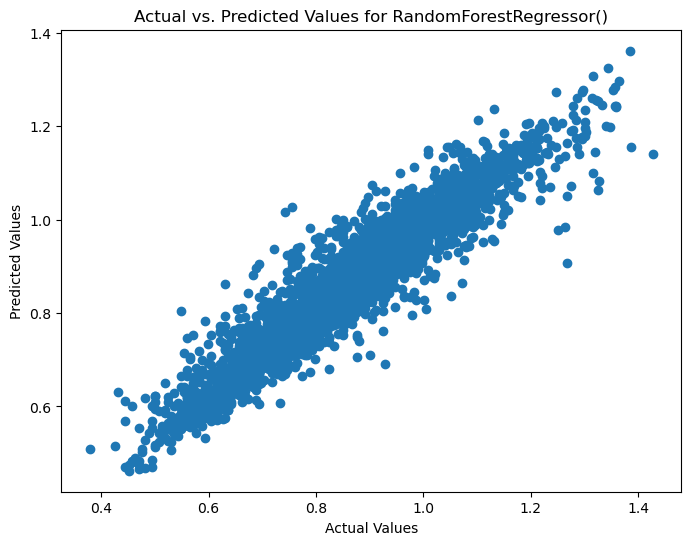

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=112)

# A list of regression models to evaluate for regression
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(alpha=1.0)),
    ('Lasso Regression', Lasso(alpha=1.0)),
    ('Random Forest Regressor', RandomForestRegressor(n_estimators=100)),
    ('SVR', SVR(kernel='linear')),
    ('Decision Tree Regressor', DecisionTreeRegressor())
]

# Initialize variables to keep track of the best model and its performance
best_model = None
best_score = -np.inf

# Iterate through the models, fit them, and evaluate their performance
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics (you can add more if needed)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Model: {model_name}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared (R2): {r2}')
    
    # Check if this model has the best performance so far
    if r2 > best_score:
        best_score = r2
        best_model = model_name

# Print the best model
print(f'Best Model: {best_model} with R-squared (R2) score of {best_score}')

# We can visualize the actual vs. predicted values for the best model
best_model_index = [model[0] for model in models].index(best_model)
best_model = models[best_model_index][1]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs. Predicted Values for {best_model}")
plt.show()

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define a parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

# Create a Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=112)

# Perform Randomized Search Cross-Validation
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist,
                                   n_iter=10, scoring='r2', cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')


Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 77}
Mean Squared Error: 0.0029459941056418385
R-squared (R2): 0.8902876633258643


In [30]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(best_model, X, Y, cv = 5)
print('Cross Validation Score :')
print("Score :" ,score)
print("Mean Score :",score.mean())
print("Std deviation :",score.std())

Cross Validation Score :
Score : [-0.08725337  0.56937942  0.69989953  0.38737729  0.04652757]
Mean Score : 0.3231860877901969
Std deviation : 0.30054789126686354


In [32]:
import joblib
joblib.dump(best_model,'Avocado Project R.pkl')

['Avocado Project R.pkl']

In [37]:
actual_costs= y_test

# Make predictions for the selected data points
Pre_average_price = best_model.predict(X_test)

# Create a DataFrame to display the results
result_df = pd.DataFrame({
    'Actual average price': actual_costs,
    'Predicted average price': Pre_average_price
})

result_df.head(10)

,Actual average price,Predicted average price
2826,0.887891,0.883795
17164,0.722706,0.776658
5785,0.887891,0.937172
16732,1.217876,1.067231
10339,0.891998,0.941636
5937,0.722706,0.730039
2038,0.683097,0.702497
14562,0.858662,0.863565
7368,0.494696,0.491866
8419,0.506818,0.603816


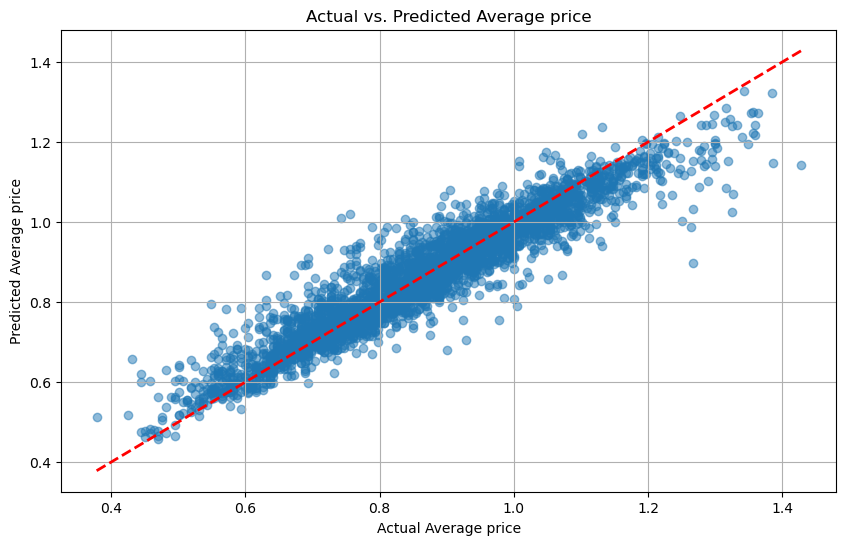

In [38]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Create a scatter plot of actual vs. predicted average price
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Average price")
plt.ylabel("Predicted Average price")
plt.title("Actual vs. Predicted Average price")
plt.grid(True)
plt.show()

In [ ]:
We can see that the model prediction is good and its make linear relationship with actual and predicted average price.